<a href="https://colab.research.google.com/github/MananLedwani/Spam_Ham_Project/blob/main/MyProject1(SPAM_HAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SPAM-HAM PROJECT
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
#Understanding Database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.size

22288

In [ ]:
df.shape

(5572, 4)

In [ ]:
df.groupby(df['label']).size()

label
ham     4825
spam     747
dtype: int64

<Axes: xlabel='label'>

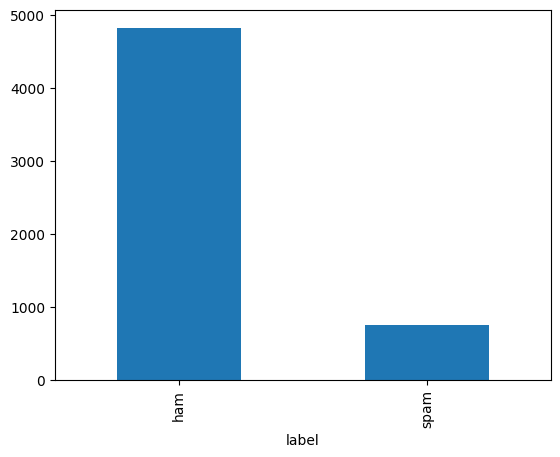

In [ ]:
#Data Visualization
df['label'].value_counts().plot(kind = 'bar')

In [ ]:
#Data Extraction
x = df.iloc[:,1].values
y = df.iloc[:,0].values

In [ ]:
#Machine Learning
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x , y , random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train_v,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_v)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.56424982053123

In [ ]:
a = df['message'][10]
a

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
a = vect.transform([a])
model.predict(a)

array(['ham'], dtype=object)

In [ ]:
c = 'win free tickets, you can win it'

In [ ]:
c = vect.transform([c])
c

<1x7546 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
model.predict(c)

array(['ham'], dtype=object)

In [ ]:
from sklearn.pipeline import make_pipeline as mp
text_model = mp(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
y_pred1 = text_model.predict(x_test)
y_pred1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
accuracy_score(y_pred1,y_test)*100

98.56424982053123